## Lending Club Case Study
### Objective of the Data Analysis:

Data used for analysis is associated with a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. The company wants to understand the key driving factors behind loan default, i.e. the variables which are strong indicators of default and utilise this information to minimize bad loans.

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv into a pandas dataframe

In [188]:
data = pd.read_csv("loan.csv", index_col=0, low_memory=False)
data.head(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


# Data cleaning

## 1. Initial step is to drop the unwanted columns 

### Drop columns that have all values as "NA" as these have no relevant information for analysis
`a. Search for all the columns with "NA"`

`b. Convert the columns to list and drop these columns`

In [190]:
subset_df = data.loc[:, data.isnull().all()]
subset_df.columns.values.tolist()

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [191]:
subset_data = data.drop(subset_df.columns.values.tolist(), axis=1)

## 2. Filter out the columns that have higher percentage of missing values

In [192]:
subset_data = subset_data.loc[:, ((subset_data.isnull().sum()/len(subset_data.index))*100) < 60]
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

## 3. Remove "%" string from the int_rate column

### Remove columns that have all zeros

In [193]:
subset_data = subset_data.drop(subset_data.columns[(subset_data == 0).all()], axis=1)

### 4. Drop columns that will not be used for the analysis

In [194]:
list_col_to_drop = ['desc','zip_code','policy_code','emp_title','pymnt_plan','title', 'url','initial_list_status',
 'collections_12_mths_ex_med','chargeoff_within_12_mths','application_type','tax_liens','member_id']
subset_data.drop(list_col_to_drop, axis=1, inplace=True)
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose         

### 5. Cleaning column - 'int_rate', 'term'
    1. Remove "%" char from int_rate
    2. Removing string "months" from term

In [195]:
#1
subset_data['int_rate']=subset_data['int_rate'].apply(lambda x: x[:-1])
#2
subset_data["term"] = subset_data.term.apply(lambda x: int(x.rstrip(" months")))

### 6. Cleaning 'loan_status' column
1. Drop the column with header "Current" which has data for the currently running loan. This information cannot be used as it is still in progress and the end result is ambiguous (can be a bad/good loan)
2. Trim leading and trailing space
3. Replace "Fully Paid" string as zero, and "Charged Off" as 1 for ease of analysis
   This means -> loan_status will have only two values 0 and 1.
   `Loan is Paid       --> 0`
   
   `Loan is defaulted  --> 1`

In [196]:
#1
subset_data = subset_data.drop(subset_data[subset_data.loan_status == "Current"].index)
#2
subset_data['loan_status'] = subset_data['loan_status'].str.strip()

def change_loan_status_column(status):
    if (status == 'Fully Paid'):
        return 0
    elif (status == 'Charged Off'):
        return 1

subset_data['loan_status'] = subset_data['loan_status'].apply(lambda x: change_loan_status_column(x))

### 7. Update "verification_status" column with "True" or "False" string for ease of analysis

In [197]:
subset_data['verification_status'] = subset_data['verification_status'].apply(lambda x: True if (x == 'Source Verified' or x == 'Verified') else False)

### 8. Update the data_type of the columns

In [198]:
# Data type updated as per the data held in the columns
subset_data['int_rate']=subset_data['int_rate'].astype(np.float64)
subset_data['term']=subset_data['term'].astype(np.int64)

# Clean the "%" string in "revol_util" column
subset_data.dropna(subset = ['revol_util'], inplace = True)
subset_data['revol_util'] = subset_data['revol_util'].apply(lambda x: x[:-1])

In [199]:
subset_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


## Derive the year column from date format 
`a. Split "issue_d" column into date & year, create a new column`

`b. Similar process to be done for "last_pymnt_d" column`

In [200]:
subset_data['issue_d'] = pd.to_datetime(subset_data['issue_d'], format="%b-%y")
subset_data['Loan_Issue_Year'] = subset_data['issue_d'].dt.year

In [201]:
subset_data.dropna(subset = ['last_pymnt_d'], inplace = True)
subset_data['last_pymnt_d'] = pd.to_datetime(subset_data['last_pymnt_d'], format="%b-%y")
subset_data['last_pymnt_date_year']=subset_data['last_pymnt_d'].dt.year

# Data Analysis
`Below code contains the various graphs based on the data obtained above. This analysis is made visual by plotting the various matrices. The plots below belong to the uni, bi and multivariate classes.`

### 1. Category-wise loans issued

<AxesSubplot:title={'center':'Categorywise Loans Issed'}, xlabel='Loan Category', ylabel='Number of loans in each category'>

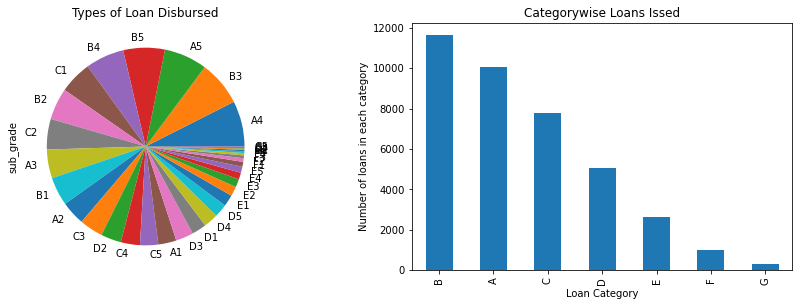

In [202]:
plt.figure(figsize=(15,10))
subset_data.value_counts(subset_data.sub_grade)

plt.subplot(2, 2, 1)
plt.title('Types of Loan Disbursed')
subset_data["sub_grade"].value_counts()[:].plot(kind='pie')

plt.subplot(2, 2, 2)
plt.title('Categorywise Loans Issed')
plt.xlabel('Loan Category')
plt.ylabel('Number of loans in each category') 
pd.value_counts(subset_data["grade"]).plot.bar()

### 2. Loan default rate

<AxesSubplot:ylabel='loan_status'>

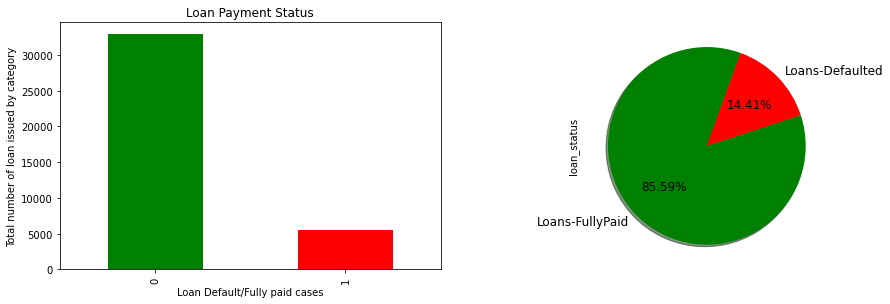

In [203]:
plt.figure(figsize=(15,10))
labels = ['Loans-FullyPaid', 'Loans-Defaulted']
# subplot 1
plt.subplot(2, 2, 1)

# Green color --> Good loan
# Red Color --> Bad Loan
subset_data.loan_status.value_counts().plot(kind = 'bar', color=['green', 'red'])
plt.title('Loan Payment Status')
plt.xlabel('Loan Default/Fully paid cases')
plt.ylabel('Total number of loan issued by category') 
# subplot 2
plt.subplot(2, 2, 2)
subset_data['loan_status'].value_counts(sort=False).plot.pie(autopct='%1.2f%%',shadow=True, labels=labels, fontsize=12, startangle=70, colors=['green', 'red'])

### 3. Total bad loan (fund lost by investors)

Text(0, 0.5, 'Total Sum Paid by investors')

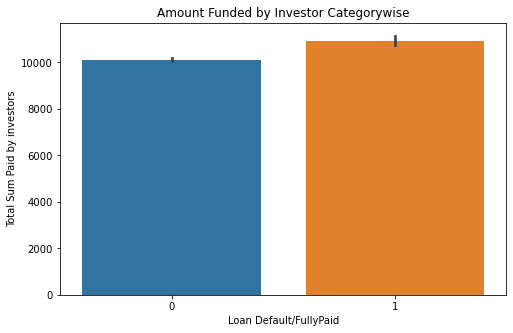

In [204]:
plt.figure(figsize=(8,5))
sns.barplot(x=subset_data['loan_status'], y=subset_data['funded_amnt_inv'])
plt.title('Amount Funded by Investor Categorywise')
plt.xlabel('Loan Default/FullyPaid')
plt.ylabel('Total Sum Paid by investors')

# The bar plots below show that the amount paid by the investors that is defaulted is quite high.
# This is a cause of concern as there is a ot of bad loan issued

### 4. Amount funded by investors on yearly basis

Text(0, 0.5, 'Year')

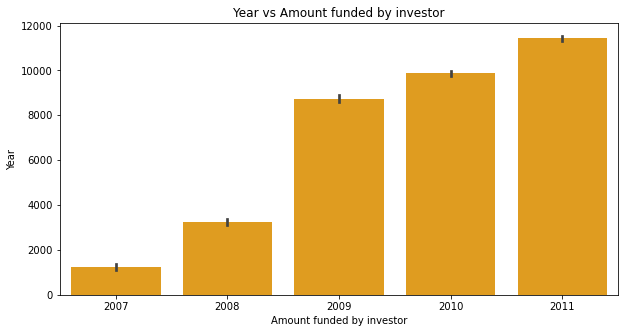

In [205]:
plt.figure(figsize=(10,5))
sns.barplot(x=subset_data['Loan_Issue_Year'], y=subset_data['funded_amnt_inv'], palette=['orange'])
plt.title('Year vs Amount funded by investor')
plt.xlabel('Amount funded by investor')
plt.ylabel('Year')

# There is a continuous increase in the loans allocated in subsequent years

### 5. Yearly distribution of loan status (Paid/Defaulted)

Text(0, 0.5, 'Amount Funded by Investor')

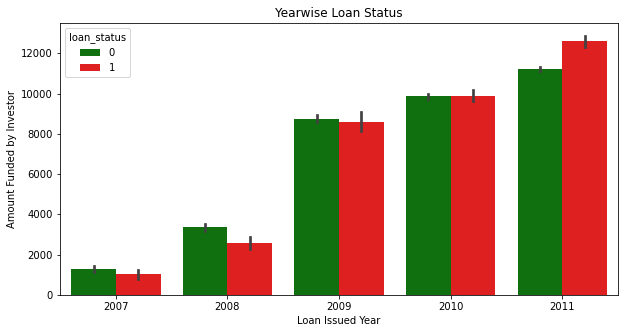

In [206]:
plt.figure(figsize=(10,5))
sns.barplot(x="Loan_Issue_Year", y="funded_amnt_inv", hue="loan_status", data=subset_data, palette=['green', 'red'])
plt.title('Yearwise Loan Status')
plt.xlabel('Loan Issued Year')
plt.ylabel('Amount Funded by Investor')

# Analysis of the state-wise content

## 1. State-wise loan distribution (% of total amount)

Text(0, 0.5, 'Amount funded by investor(%)')

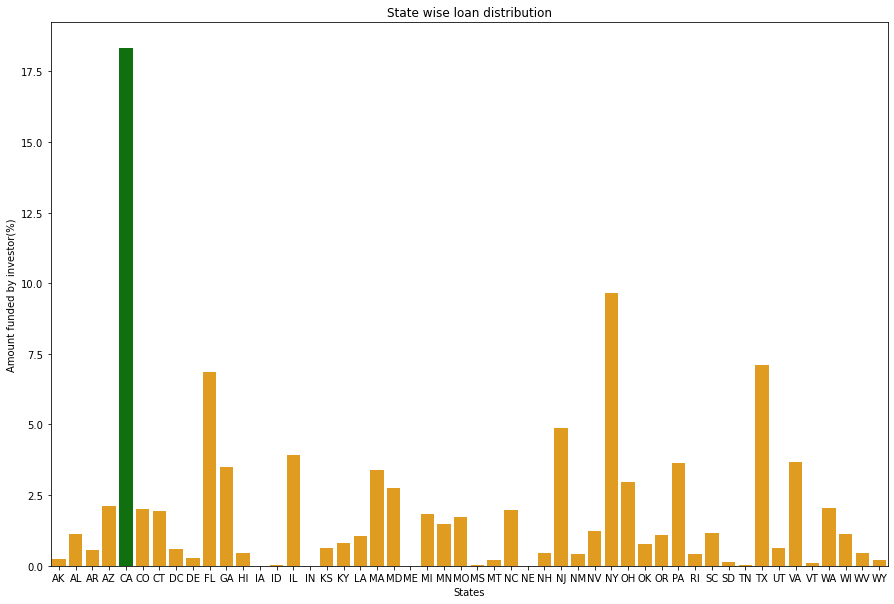

In [207]:
df = subset_data.groupby(['addr_state'], as_index=False ).funded_amnt_inv.sum()
plt.figure(figsize=(15,10))
y_percent=df['funded_amnt_inv']/df['funded_amnt_inv'].sum()*100
clrs = ['orange' if (x < max(y_percent)) else 'green' for x in y_percent]
sns.barplot(x=df['addr_state'], y = y_percent, palette=clrs)
plt.title('State wise loan distribution')
plt.xlabel('States')
plt.ylabel('Amount funded by investor(%)')

## 2. State-wise distribution of interest rate

Text(0, 0.5, 'Interest rate')

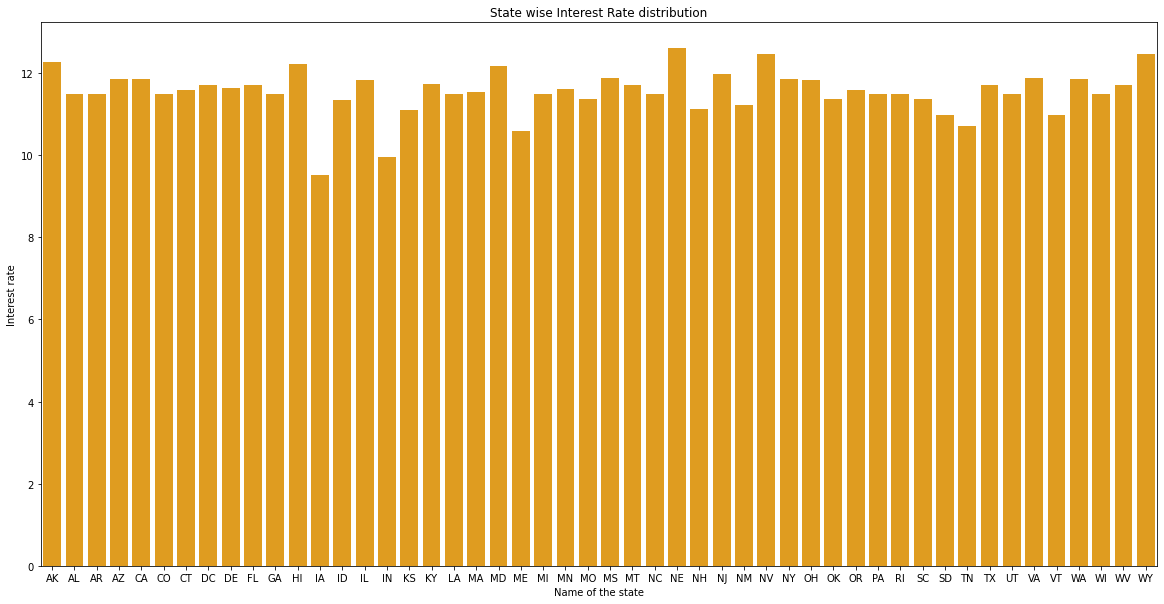

In [208]:
df= subset_data.groupby(['addr_state'], as_index=False ).int_rate.median()

plt.figure(figsize=(20,10))
sns.barplot(x=df['addr_state'], y = df['int_rate'], palette=['orange'])
plt.title('State wise Interest Rate distribution')
plt.xlabel('Name of the state')
plt.ylabel('Interest rate')

## 3. Statewise Average annual income of clients

Text(0, 0.5, 'Average Annual income')

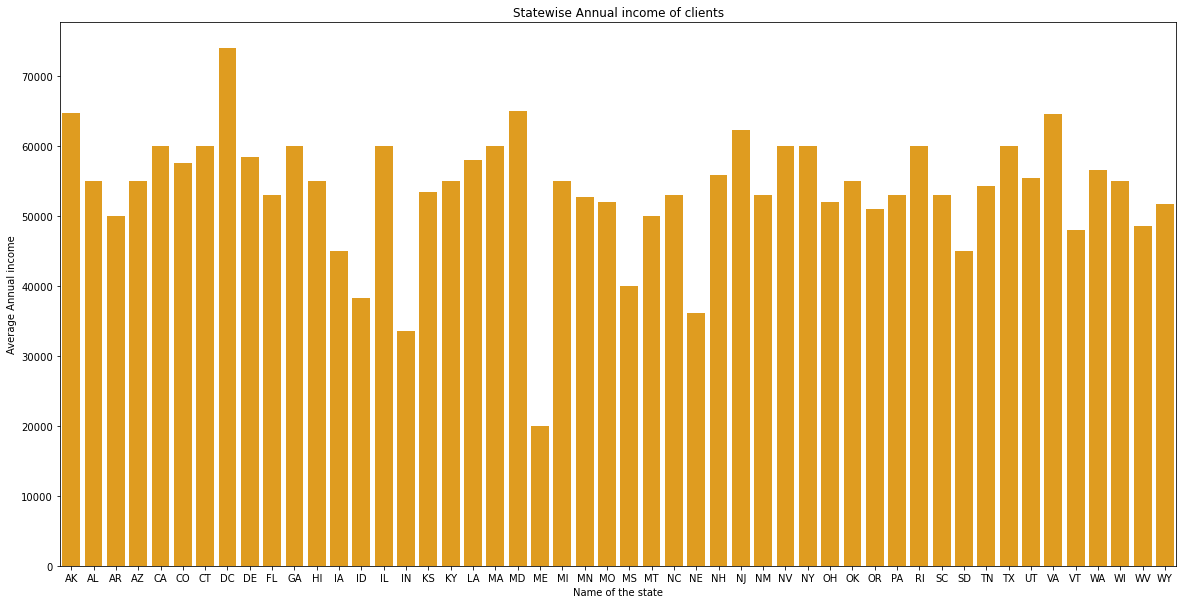

In [209]:
df= subset_data.groupby(['addr_state'], as_index=False ).annual_inc.median()

plt.figure(figsize=(20,10))
sns.barplot(x=df['addr_state'], y = df['annual_inc'], palette=['orange'])
plt.title('Statewise Annual income of clients')
plt.xlabel('Name of the state')
plt.ylabel('Average Annual income')

## 4. Statewise  debt to income comparison
`A low debt-to-income (DTI) ratio demonstrates a good balance between debt and income. Borrowers with low debt-to-income ratios are likely to manage their monthly debt payments effectively and hence banks and financial credit providers want to see low DTI ratios before issuing loans to a potential borrower`

Text(0, 0.5, 'dti')

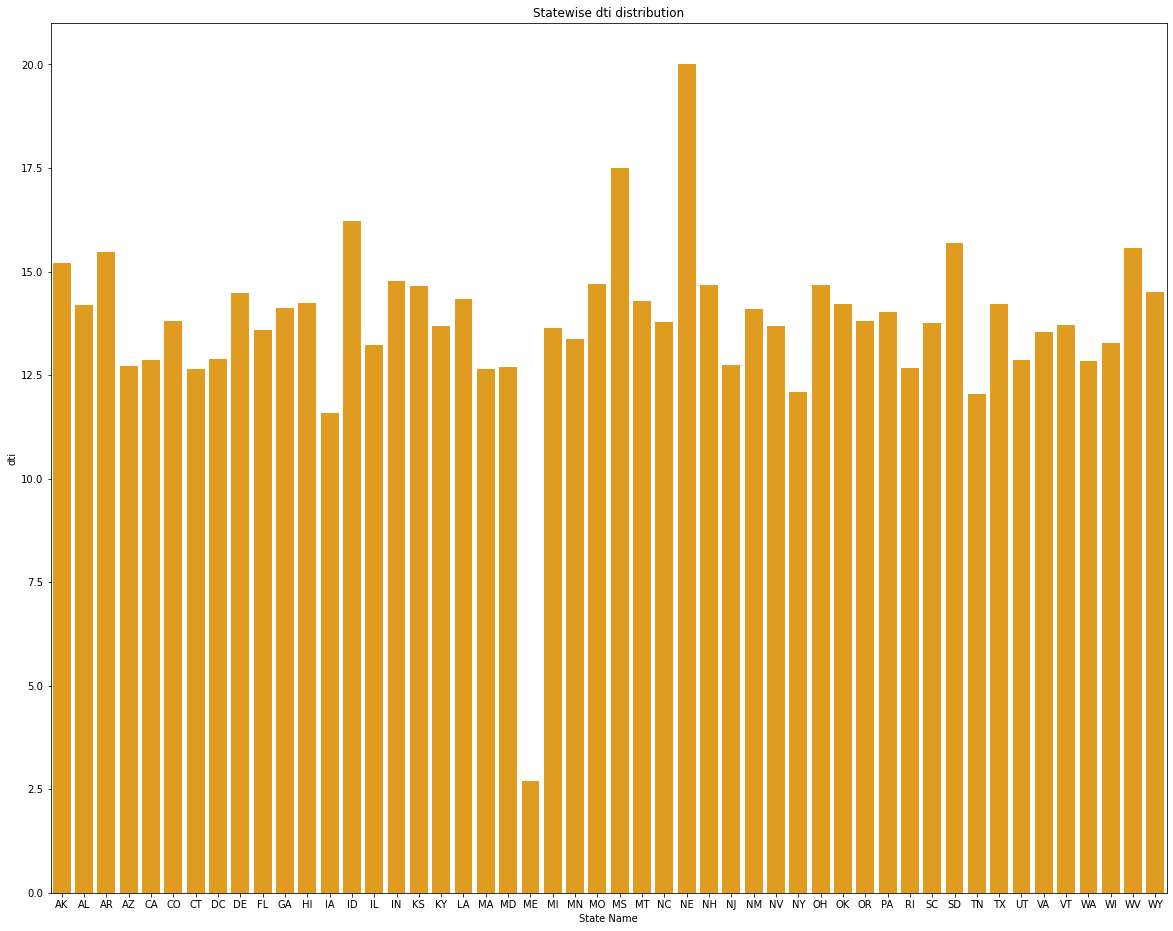

In [210]:
df = subset_data.groupby(['addr_state'], as_index=False ).dti.median()

plt.figure(figsize=(20,16))
sns.barplot(x=df['addr_state'], y = df['dti'], palette=['orange'])
plt.title('Statewise dti distribution')
plt.xlabel('State Name')
plt.ylabel('dti')

## 5.Statewise Defaulters density

Text(0, 0.5, 'Defaulters(%)')

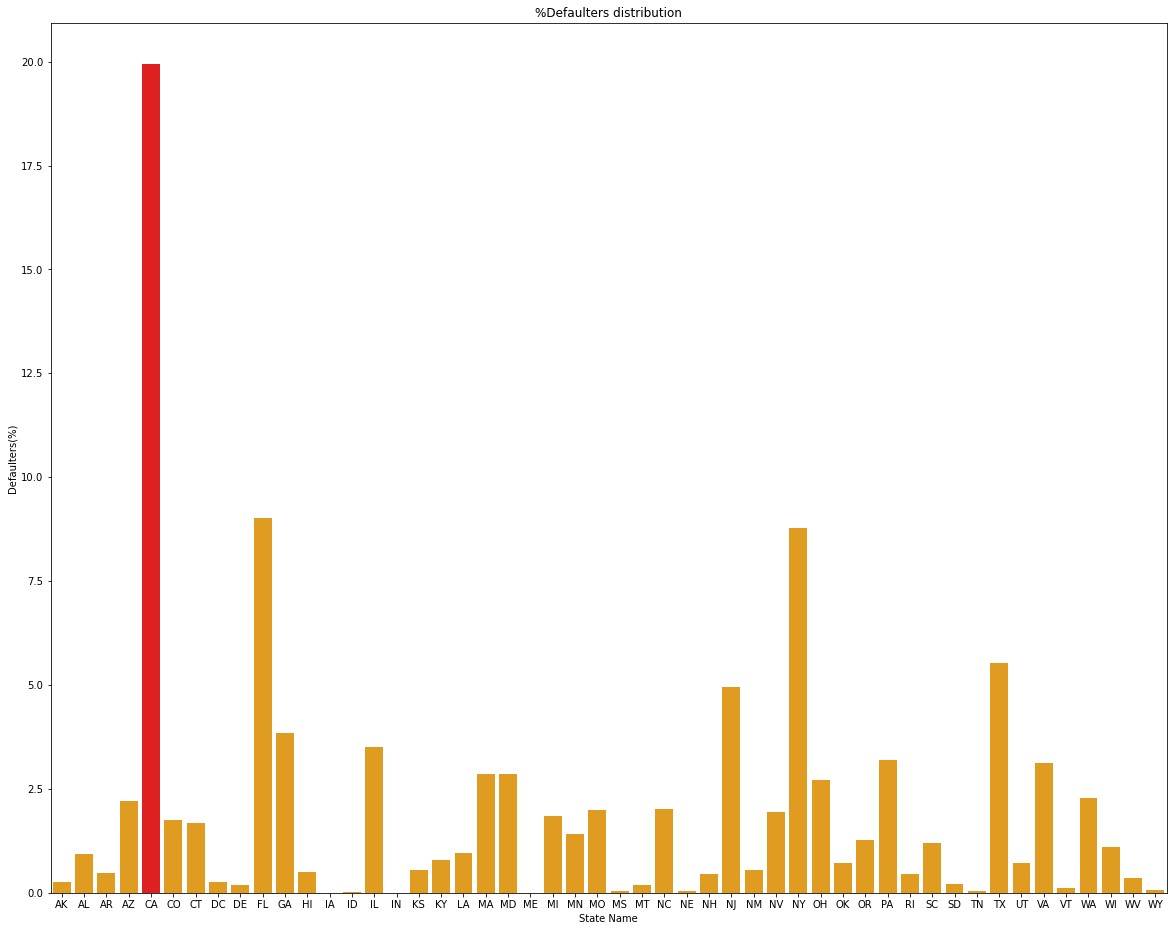

In [211]:
df = subset_data.groupby(['addr_state'], as_index=False ).loan_status.sum()
plt.figure(figsize=(20,16))

y_percent = df['loan_status']/df['loan_status'].sum()*100
clrs = ['orange' if (x < max(y_percent)) else 'red' for x in y_percent]

sns.barplot(x=df['addr_state'], y = y_percent, palette=clrs)
plt.title('%Defaulters distribution')
plt.xlabel('State Name')
plt.ylabel('Defaulters(%)')

# Homeownership Vs loan status

Text(0, 0.5, 'Defaulters(%)')

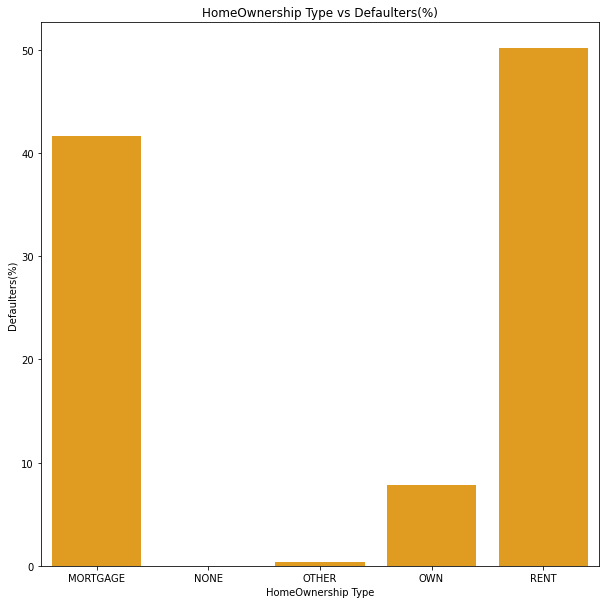

In [212]:
df = subset_data.groupby(['home_ownership'], as_index=False ).loan_status.sum()
plt.figure(figsize=(10,10))
sns.barplot(x=df['home_ownership'], y = df['loan_status']/df['loan_status'].sum()*100, palette=['orange'])
plt.title('HomeOwnership Type vs Defaulters(%)')
plt.xlabel('HomeOwnership Type')
plt.ylabel('Defaulters(%)')

# Loans Tenure vs Defaulters

Text(0, 0.5, 'Loan Defaulted in the category (%)')

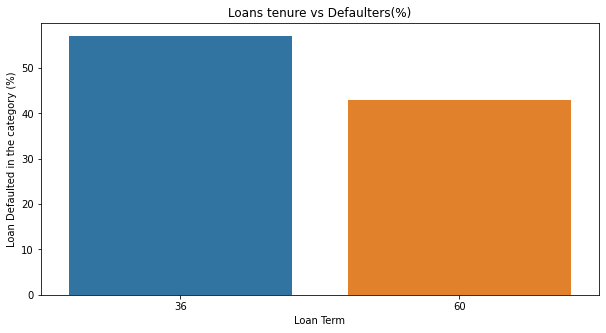

In [213]:
plt.figure(figsize=(10,5))
df = subset_data.groupby(['term'], as_index=False).loan_status.sum()
sns.barplot(x=df['term'], y=df['loan_status']/df['loan_status'].sum()*100)
plt.title('Loans tenure vs Defaulters(%)')
plt.xlabel('Loan Term')
plt.ylabel('Loan Defaulted in the category (%)')

# Income Wise Analysis

## 1.Categorise Income - Low, Medium and High
`Clients are categorized as below in terms of IncomeGroup`

`a. income less than 20000 --> Very_Low`

`b. income more than 20000 and less than 60000 --> Low`

`c. income more than 60000 and less than 120000 --> Medium`

`d. income more than 120000 and less than 300000 --> High`

`e. income more than 300000 --> Very_High`


In [214]:
def income_categery(inc):
        if (inc < 20000 ):
            return 'Very_Low'
        if ((inc >= 20000) and (inc <=60000)):
            return 'Low'
        if ((inc >= 60000) and (inc <=120000)):
            return 'Medium'
        if ((inc >= 120000) and (inc <=300000)):
            return 'High'
        if (inc > 300000):
            return 'Very_High'

subset_data.loc[:, 'Income_Group'] = subset_data['annual_inc'].apply( lambda x: income_categery(x))

## 2. Income group vs Defaulters

Text(0, 0.5, 'Defaulters(%)')

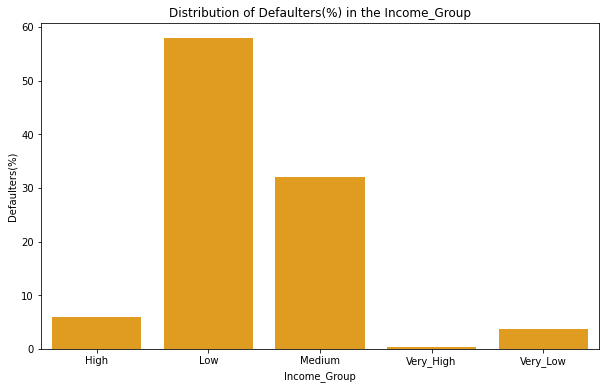

In [215]:
df = subset_data.groupby(['Income_Group'], as_index=False ).loan_status.sum()
plt.figure(figsize=(10,6))
sns.barplot(x=df['Income_Group'], y = df['loan_status']/df['loan_status'].sum()*100, palette=['orange'])
plt.title('Distribution of Defaulters(%) in the Income_Group')
plt.xlabel('Income_Group')
plt.ylabel('Defaulters(%)')

## 3. Loan funding in terms of Income Group

Text(0, 0.5, '% funding of total loan amount')

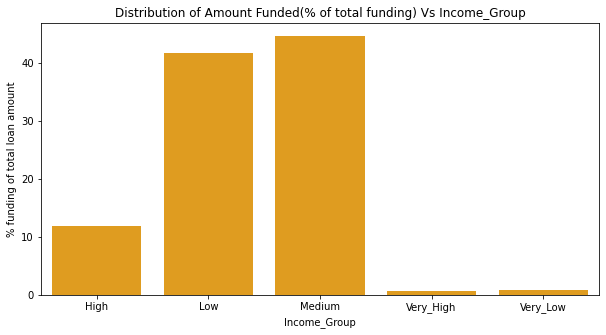

In [216]:
# income groupv vs loan amount
df = subset_data.groupby(['Income_Group'], as_index=False ).funded_amnt_inv.sum()
plt.figure(figsize=(10,5))
sns.barplot(x=df['Income_Group'], y = df['funded_amnt_inv']/df['funded_amnt_inv'].sum()*100, palette=['orange'])
plt.title('Distribution of Amount Funded(% of total funding) Vs Income_Group')
plt.xlabel('Income_Group')
plt.ylabel('% funding of total loan amount')

## 4. Income Group vs Debt-to-Income (DTI) Ratio

Text(0, 0.5, 'Debt-to-Income (DTI) Ratio')

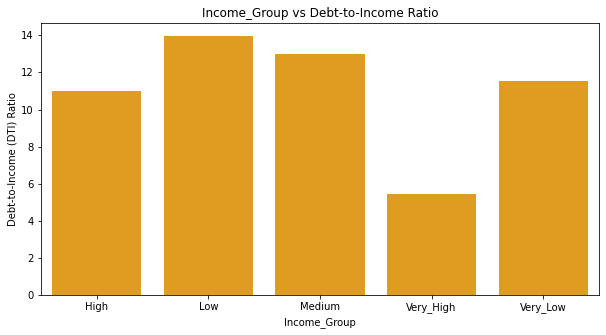

In [217]:
df = subset_data.groupby(['Income_Group'], as_index=False ).dti.mean()
plt.figure(figsize=(10,5))
sns.barplot(x=df['Income_Group'], y = df['dti'], palette=['orange'])
plt.title('Income_Group vs Debt-to-Income Ratio')
plt.xlabel('Income_Group')
plt.ylabel('Debt-to-Income (DTI) Ratio')

# Dependency of Loan borrowing on clients maturity (years of experience)

## 1. Group the data into relevant categories 
`Convert string into absolute numbers for ease of analysis`

In [218]:
dataframe = [subset_data]
subset_data['emp_length_int'] = np.nan

for col in dataframe:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"]  = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

#subset_data.drop('emp_length', axis = 1)
subset_data = subset_data[~(subset_data['emp_length_int'].isna())]

## 2. Categorise years of experience - Low, Medium and High
`Assumption:`

`Experience_Category:`

`Experience less than 2 yrs --> 'Low'`

`Experience more than 2 yrs and less than 7 yrs is grouped as 'Medium'`

`Experience more than 7 yrs and less than 12 yrs is grouped as 'High'`

`Experience more than 12 yrs is grouped as 'Expert'`

In [219]:
def experience_categery(year):
        if (year < 2):
            return 'Low'
        if ((year >= 2) and (year < 7)):
            return 'Medium'
        if ((year >= 7) and (year < 12)):
            return 'High'
        if (year >= 12):
            return 'Expert'

subset_data = subset_data.assign(Experience_Category = subset_data['emp_length_int'].apply(lambda x: experience_categery(x)))

## 3. Experience_range vs dti

Text(0, 0.5, 'Debt-to-Income (DTI) Ratio')

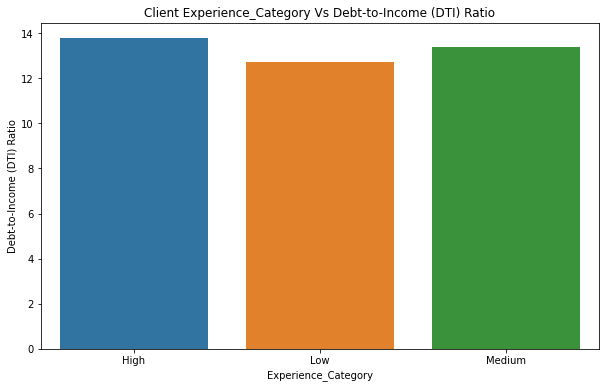

In [220]:
plt.figure(figsize=(10,6))
df= subset_data.groupby(['Experience_Category'], as_index=False ).dti.median()
sns.barplot(x=df['Experience_Category'], y = df['dti'])
plt.title('Client Experience_Category Vs Debt-to-Income (DTI) Ratio')
plt.xlabel('Experience_Category')
plt.ylabel('Debt-to-Income (DTI) Ratio')

# Analysis based on LC assigned loan grade and sub-grade

## 1. LC assigned loan grade vs Defaulters

<AxesSubplot:title={'center':'LC assigned loan grade vs Defaulters'}, xlabel='grade'>

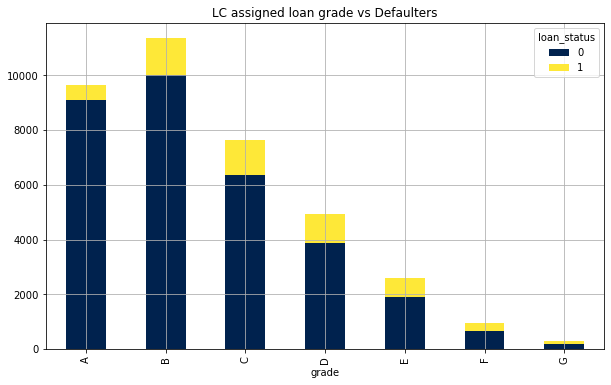

In [221]:
cmap = plt.cm.cividis
defaulters_by_grade = subset_data.groupby(['grade', 'loan_status']).size()
defaulters_by_grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, grid=True, figsize=(10,6), title="LC assigned loan grade vs Defaulters")

## 2. Sub-grade vs Defaulters

<AxesSubplot:title={'center':'Sub-grade vs Defaulters'}, xlabel='sub_grade'>

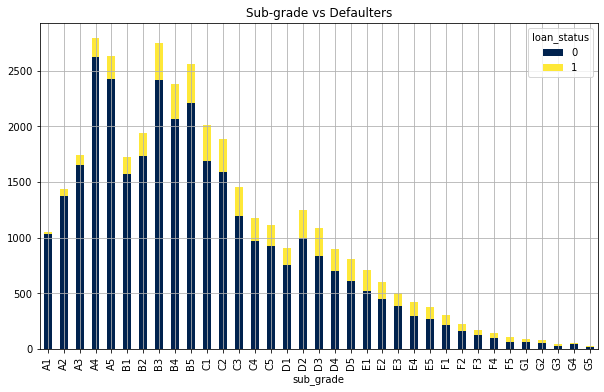

In [222]:
defaulters_by_sub_Grade=subset_data.groupby(['sub_grade','loan_status']).size()
defaulters_by_sub_Grade.unstack().plot(kind='bar', stacked=True, colormap=cmap, grid=True, figsize=(10,6), title="Sub-grade vs Defaulters")

## 3. Loan issued year vs interest rate for Defaulters

<AxesSubplot:title={'center':'Loan issued year vs interest rate for Defaulters'}, xlabel='Loan_Issue_Year'>

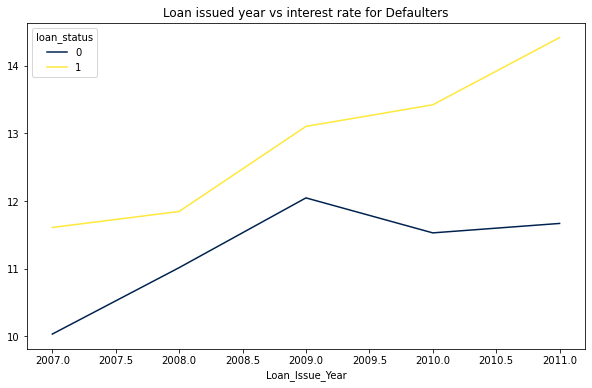

In [223]:
by_interest=subset_data.groupby(['Loan_Issue_Year','loan_status']).int_rate.mean()
by_interest.unstack().plot(colormap=cmap, figsize=(10,6), title='Loan issued year vs interest rate for Defaulters')

#  Purpose of loan vs  Defaulters

<AxesSubplot:xlabel='purpose'>

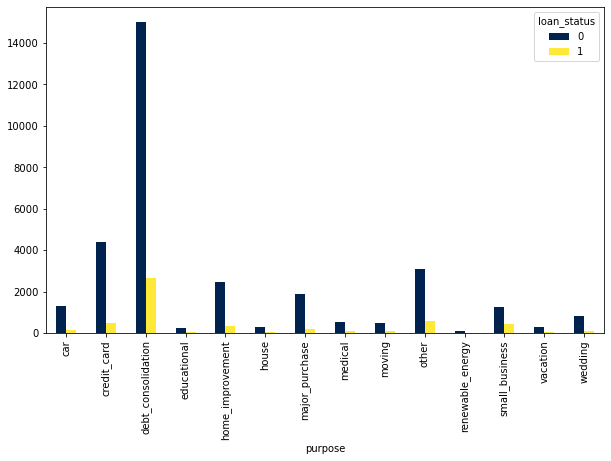

In [224]:
df= subset_data.groupby(['purpose', 'loan_status'], as_index=True ).size()
df.unstack().plot(kind='bar',  legend=True, figsize=(10,6), colormap=cmap)

# Correlation Matrix

(9.5, -0.5)

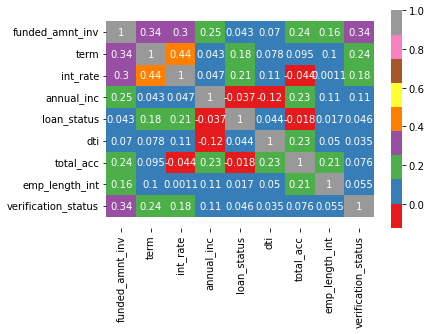

In [225]:
corr_matirx = subset_data[['funded_amnt_inv','term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'annual_inc', 'loan_status', 'purpose', 'addr_state', 'dti', 'total_acc', 'Income_Group', 'emp_length_int', 'Experience_Category', 'verification_status']].corr()
ax = sns.heatmap(corr_matirx, annot = True, cmap="Set1")
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)

 # Conclusion

#### 1. Average annual income and loan status have negative correlation so lower the income higher the default. This is evident form the graph as well as correlation matrix.
#### 2. DTI and annual income have negative correlation so increase in salary will decrease DTI and hence increase chances of loan approval.
#### 3. Clients with Low Income Group are more likely to default.
#### 4. Loan taken for debt consolidation has highest number of defaulters.
#### 5. Loan grade B has highest number of defaulters.
#### 6. Loan default is seen the most in 36 month term.
#### 7. CA state has most of the defaulters